<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

## Linear vs Kernel PCA Demo

_Author: Justin Pounders_

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles, make_blobs

plt.style.use('bmh')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## PCA Review

Principal component analysis (PCA) is fundamentally a feature transformation method.  If you give it _centered_ data ("de-meaned"), then it will transform your data into a new dataset (i.e., with transformed features).  These new features are linear combinations of your old features, but the benefit is that new features, called principal components, have zero mutual covariance and they are ranked in order of variance.  

Geometrically, your old data was rotated and stretched onto a new set of axes.

### Example

Let's generate some toy data to demonstrate what is happening with PCA.

Our data has two features, let's call them $x_1$ and $x_2$, and a discrete target variable, $y$.  (Recall that PCA doesn't care about $y$, but we will look at the impact on on correlation with the target anyway.)  I am limiting this example to two features so that we can visualize what is going on!

Let's make a scatter plot of our features and indicate the target variable using color.

Text(0,0.5,'y_1')

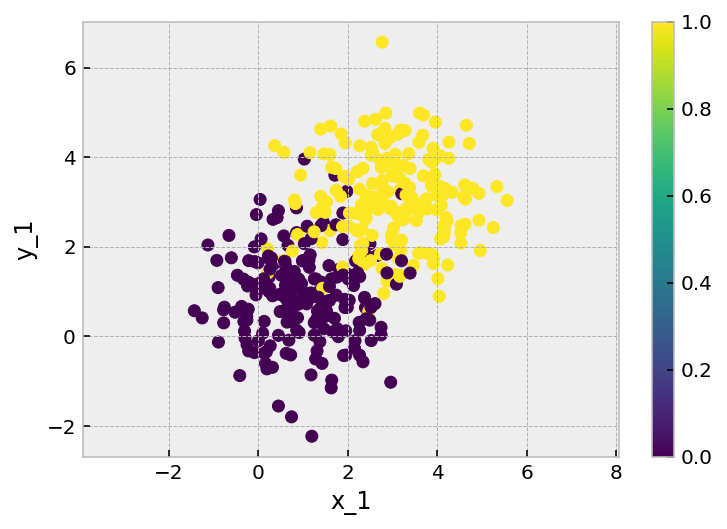

In [2]:
data_X, data_y = make_blobs(n_samples=400, centers=[[1,1],[3,3]], cluster_std=[1,1], random_state=123)

plt.scatter(data_X[:,0], data_X[:,1], c=data_y)
plt.colorbar()
plt.axis('equal');
plt.xlabel('x_1')
plt.ylabel('y_1')

In the above plot you can see that both $x_1$ and $x_2$ are correlated with $y$.  You can also see that $x_1$ and $x_2$ are highly correlated _with each other_.

In [3]:
from scipy.stats.stats import spearmanr
print('Correlation of x_1 and x_2 = ', spearmanr(data_X[:,0], data_X[:,1])[0])
print('Correlation of x_1 and y   = ', spearmanr(data_X[:,0], data_y)[0])
print('Correlation of x_2 and y   = ', spearmanr(data_X[:,1], data_y)[0])

Correlation of x_1 and x_2 =  0.5535645847786549
Correlation of x_1 and y   =  0.7075449659733598
Correlation of x_2 and y   =  0.7614552158287352


Now let's use PCA to find two new directions/components/features that will maximize variance along the first principal component then the second principal component.

In [4]:
# Instantiate the PCA objcet
linear_pca = PCA(n_components=2)

# "fit" the PCA object and transform our data
data_Z = linear_pca.fit_transform(data_X)

And plot...

Text(0,0.5,'Principal component 2')

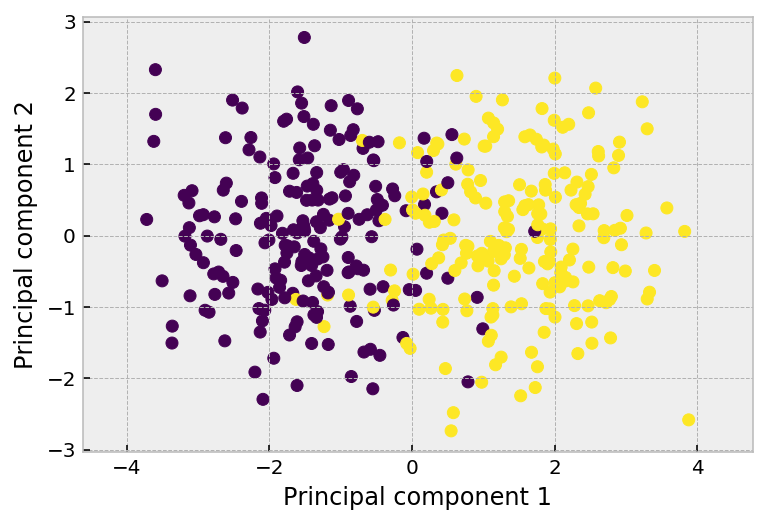

In [5]:
plt.scatter(data_Z[:,0], data_Z[:,1], c=data_y)
plt.axis('equal');
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

Compare the plot below with where we started.  You can see that data was effectively rotated so that the most variance is in the "horizontal" direction which we would call principal component 1.

Now let's compute the correlation coefficients.

In [6]:
print('Correlation of PC1 and PC2 = ', spearmanr(data_Z[:,0], data_Z[:,1])[0])
print('Correlation of PC1 and y   = ', spearmanr(data_Z[:,0], data_y)[0])
print('Correlation of PC2 and y   = ', spearmanr(data_Z[:,1], data_y)[0])

Correlation of PC1 and PC2 =  0.01695723098269364
Correlation of PC1 and y   =  0.8226401018091732
Correlation of PC2 and y   =  -0.021304291509112182


You see that PC1 and PC2 are not correlated, and now PC1 looks a great predictor for $y$!

> Remember that that PC1 being correlated with $y$ is a byproduct of the fact that we initially knew that both $x_1$ and $x_2$ were correlated with $y$.

Now let's look at a simple logistic regression trained on...

- both $x_1$ and $x_2$,
- only $x_1$,
- only $x_2$, and
- only $PC1$.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
print('Mean CV scores; original data (2-dim)     = ',    cross_val_score(lr, 
                                                                     data_X, 
                                                                     data_y, 
                                                                     cv=5).mean())
print('Mean CV scores; original data (1-dim, x1) = ',    cross_val_score(lr, 
                                                                     data_X[:,0].reshape(-1,1), 
                                                                     data_y, 
                                                                     cv=5).mean())
print('Mean CV scores; original data (1-dim, x2) = ',    cross_val_score(lr, 
                                                                     data_X[:,1].reshape(-1,1), 
                                                                     data_y, 
                                                                     cv=5).mean())
print('Mean CV scores; transformed data (1-dim)  = ', cross_val_score(lr, 
                                                                     data_Z[:,0].reshape(-1,1), 
                                                                     data_y, cv=5).mean())

Mean CV scores; original data (2-dim)     =  0.9225
Mean CV scores; original data (1-dim, x1) =  0.8150000000000001
Mean CV scores; original data (1-dim, x2) =  0.8625
Mean CV scores; transformed data (1-dim)  =  0.9199999999999999


So you see that of the 3 1D models, the PC1-based model clearly is the best in terms of accuracy.

### A little fun...

We saw above that our data was rotated to better align our data with our axes (aka principal components).  Let's take that a step further.

- Let's define a grid of data points, then
- Transform the entire grid of data onto the principal component axes.

This will let us visualize the transformation of our feature space!

Text(0,0.5,'x2')

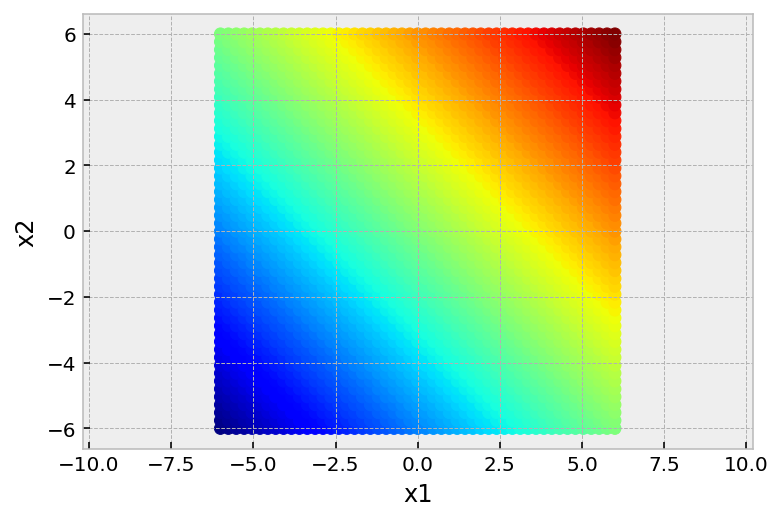

In [8]:
# Make a grid of data points
grid_points = np.linspace(-6,6,51)
grid_x, grid_y = np.meshgrid(grid_points, grid_points)

# This will color our data points so that we can see how they are transformed
grid_c = (grid_x+grid_y)/2

# Plot it
plt.scatter(grid_x, grid_y, c=grid_c, cmap=cm.jet)
plt.axis('equal');
plt.xlabel('x1')
plt.ylabel('x2')

Text(0,0.5,'Principal component 2')

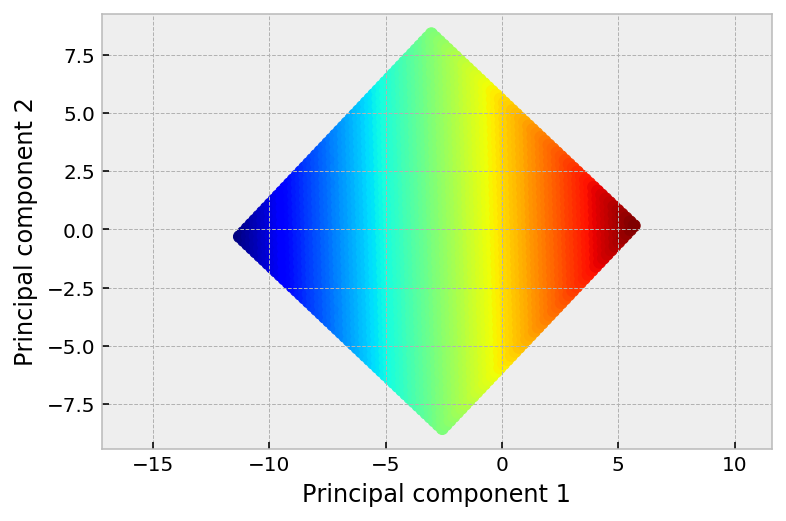

In [9]:
# Let's take each point in our grid and transform them using our PCA.
# We'll keep the color of the points the same so that we see how they move.
transformed_grid_val_x = np.zeros_like(grid_x)
transformed_grid_val_y = np.zeros_like(grid_y)
for i,x in enumerate(grid_points):
    for j,y in enumerate(grid_points):
        u = (x,y)
        v = linear_pca.transform([u])
        transformed_grid_val_x[i,j] = v[0][0]
        transformed_grid_val_y[i,j] = v[0][1]

plt.scatter(transformed_grid_val_x.flatten(), 
            transformed_grid_val_y.flatten(), 
            c=grid_c.flatten(), 
            cmap=cm.jet)
plt.axis('equal');
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

From this plot we can see that we have essentially taken the $x_1$-$x_2$ "space" of data and rotated it clockwise by about 45 degrees.  This is the same thing we saw with our original data, this just gives a broader perspective into the transformation.

## Intro to Kernel PCA

With kernel PCA, we will effectively be lifting our data into a higher dimensional space, do PCA in that higher-dimensional space, then project it back down to 2 dimensions that will be our final principal components.

This process of lifting up then projecting back down allows us to capture nonlinear structures and is known as the kernel trick.

The actual [implementation](https://en.wikipedia.org/wiki/Kernel_principal_component_analysis#Introduction_of_the_Kernel_to_PCA) of this is a bit nuanced.  Suffice it to say that there is a shortcut so that the computer doesn't actually have to form the higher-dimensional vectors for our data points!

Let's start by making some nonlinear data.

Text(0,0.5,'x2')

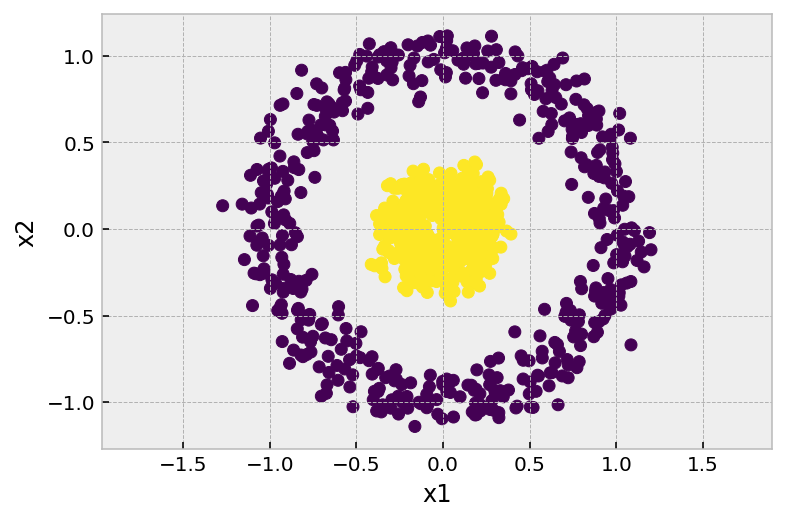

In [10]:
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(circles_X[:,0], circles_X[:,1], c=circles_y)
plt.axis('equal');
plt.xlabel('x1')
plt.ylabel('x2')

There is very clear structure in this data; namely, a circle around a sphere.  Neither the circle nor the sphere are linear, however, because there is no line that can be drawn neatly through the center regions of these data.

Let's give plain linear PCA a shot just to convince ourselves that it will indeed fail to find new (linear) dimensions that are meaningful.

In [11]:
linear_pca = PCA(n_components=2)
linear_Z = linear_pca.fit_transform(circles_X)

Text(0,0.5,'Principal Component 2')

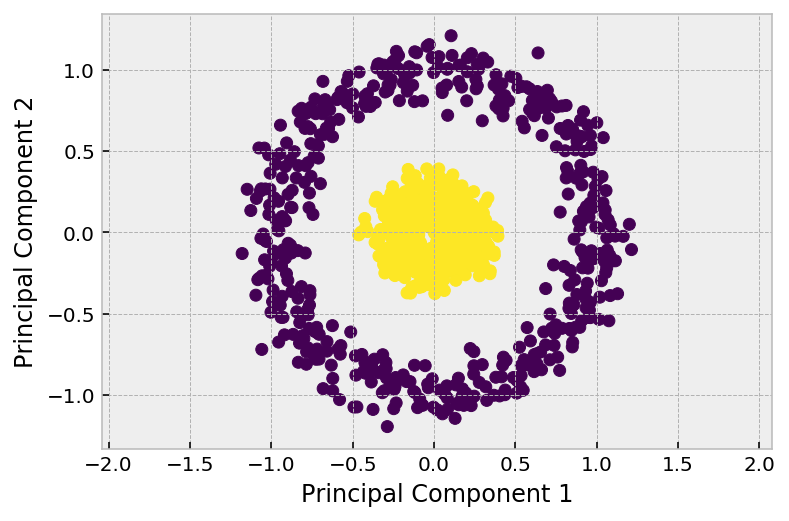

In [12]:
plt.scatter(linear_Z[:,0], linear_Z[:,1], c=circles_y)
plt.axis('equal')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

No change!  The data points themselves actually did change (they were rotated), but rotating a circle doesn't produce anything useful!  Ah... nonlinearity...

So let's pull in kernel PCA with an "RBF" (or Gaussian) kernel.  This is the same kernel that you saw with [SVMs](https://git.generalassemb.ly/DSI-US-4/6.04-lesson-support_vector_machines-svm)!

In [13]:
kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=1.5, random_state=123)
kernel_Z = kernel_pca.fit_transform(circles_X)

Now let's plot our nonlinearly transformed data.

Text(0,0.5,'Principal Component 2')

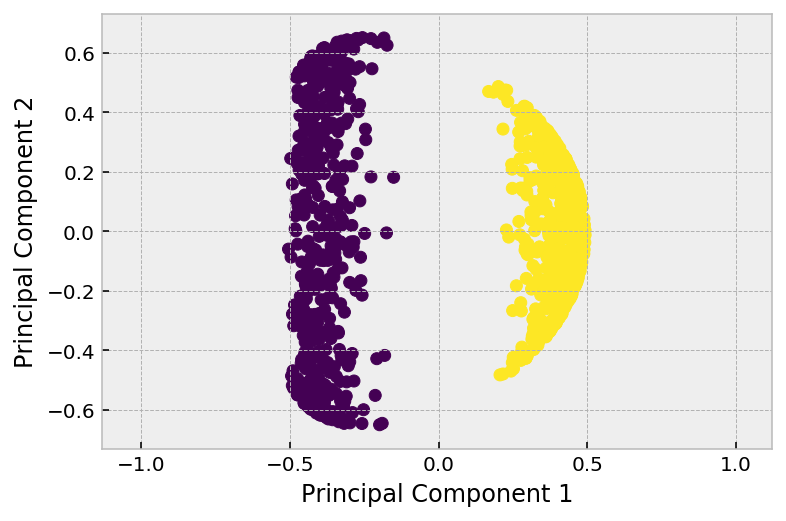

In [14]:
plt.scatter(kernel_Z[:,0], kernel_Z[:,1], c=circles_y)
plt.axis('equal')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

Whoa!!  Now that's pretty cool.  It's cool for two reasons, actually.

1. It still (like linear PCA) identified directions of maximal variance.
2. It actually sepsrated our classes really nicely in this case.  We could totally use a linear classifier to make predictions on this new data!

How about those correlations?

In [15]:
print('Correlation of PC1 and PC2 = ', spearmanr(kernel_Z[:,0], kernel_Z[:,1])[0])
print('Correlation of PC1 and y   = ', spearmanr(kernel_Z[:,0], circles_y)[0])
print('Correlation of PC2 and y   = ', spearmanr(kernel_Z[:,1], circles_y)[0])

Correlation of PC1 and PC2 =  0.029441501441501445
Correlation of PC1 and y   =  0.8660258367974653
Correlation of PC2 and y   =  -0.007142981101905494


Let's see how logistic regression fairs, as we did before.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
print('Mean CV scores; original data (2-dim)     = ',    cross_val_score(lr, 
                                                                     circles_X, 
                                                                     circles_y, 
                                                                     cv=5).mean())
print('Mean CV scores; original data (1-dim, x1) = ',    cross_val_score(lr, 
                                                                     circles_X[:,0].reshape(-1,1), 
                                                                     circles_y, 
                                                                     cv=5).mean())
print('Mean CV scores; original data (1-dim, x2) = ',    cross_val_score(lr, 
                                                                     circles_X[:,1].reshape(-1,1), 
                                                                     circles_y, 
                                                                     cv=5).mean())
print('Mean CV scores; transformed data (1-dim)  = ', cross_val_score(lr, 
                                                                     kernel_Z[:,0].reshape(-1,1), 
                                                                     circles_y, cv=5).mean())

Mean CV scores; original data (2-dim)     =  0.489
Mean CV scores; original data (1-dim, x1) =  0.5010000000000001
Mean CV scores; original data (1-dim, x2) =  0.48199999999999993
Mean CV scores; transformed data (1-dim)  =  1.0


Perfect score after transformation.  That's becase we were able to get so clean a seperation between our two classes that there was _no_ overlap at all!  Nice!

### More fun...

Let's once again make a grid of points to see how they "move" through the transformation.  In this case, I will color the points according to their distance from the origin/center, because _really_ the only dimension of interest in this case is that radial position.

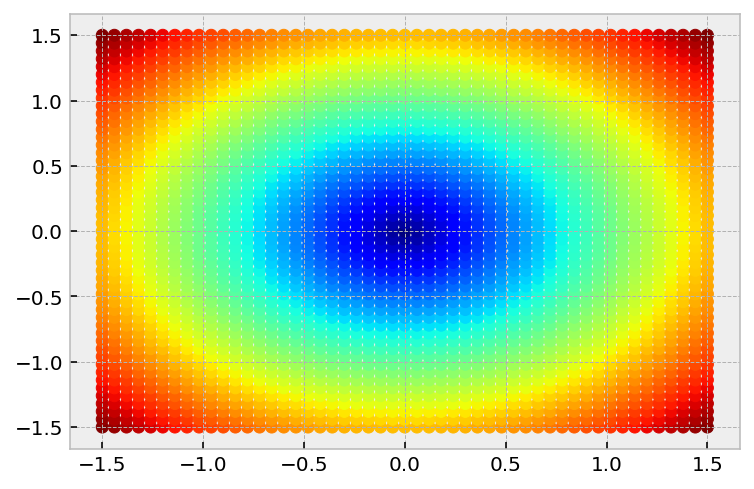

In [19]:
# Grid points colored by distance from center
grid_points = np.linspace(-1.5,1.5,51)
grid_x, grid_y = np.meshgrid(grid_points, grid_points)
grid_c = np.sqrt(grid_x**2 + grid_y**2)
plt.scatter(grid_x.flatten(), grid_y.flatten(), c=grid_c.flatten(), cmap=cm.jet)

Now transform those points and plot the result.

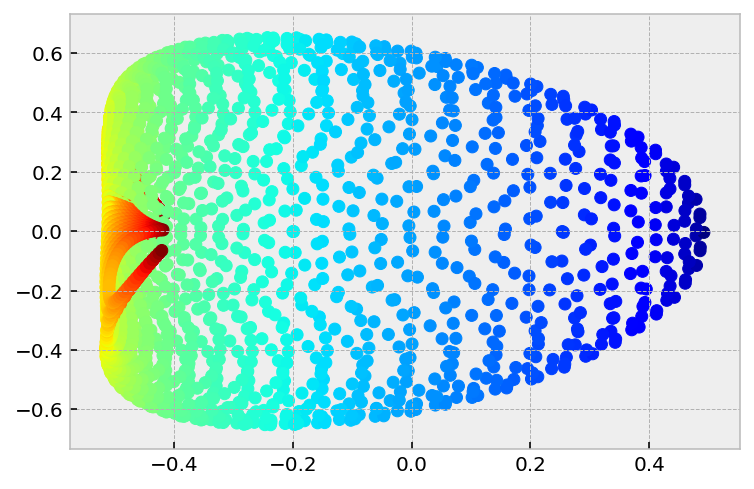

In [20]:
transformed_grid_val_x = np.zeros_like(grid_x)
transformed_grid_val_y = np.zeros_like(grid_y)
for i,x in enumerate(grid_points):
    for j,y in enumerate(grid_points):
        u = (x,y)
        v = kernel_pca.transform([u])
        transformed_grid_val_x[i,j] = v[0][0]
        transformed_grid_val_y[i,j] = v[0][1]
        
plt.scatter(transformed_grid_val_x.flatten(), 
            transformed_grid_val_y.flatten(), 
            c=grid_c.flatten(), cmap=cm.jet)

That, my friends, is a nonlinear transformation.  Notice how all of the originally blue points (toward the center of our first plot) have been dispersed and scattered.  The more extremal (red) points have been mashed into the left-side of the plot, even wrapping back over the green points a bit.  That last point is an example of how higher dimensions are overlapping when they are projected back down!